<a href="https://colab.research.google.com/github/Aldistwn29/Matakuliah_Data_Science/blob/main/Prediksi_Penyakit_Jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Kolom Dataset**
Age\
Sex\
Chest Pain Type\
Resting Blood Pressure\
Cholesterol Level\
Fasting Blood Sugar\
Resting Electrocardiographic Results\
Maximum Heart Rate Achieved\
Exercise-Induced Angina\
ST Depression\
Peak Exercise ST Segment\
Number of Major Vessels Colored by Fluoroscopy\
Thalassemia\
Target (0 = No Disease, 1 = Disease)

# **Data Cleaning**

In [101]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [103]:
missing_values = data.isnull().sum()
print(missing_values)

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [104]:
data.shape

(1025, 14)

In [71]:
data.sample(20)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
934,42,Male,Non-anginal pain,130,180,Lower than 120 mg/ml,ST-T wave abnormality,150,No,0.0,Downsloping,Zero,Fixed Defect,1
974,43,Male,Typical angina,110,211,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,Zero,Reversable Defect,1
281,35,Male,Atypical angina,122,192,Lower than 120 mg/ml,ST-T wave abnormality,174,No,0.0,Downsloping,Zero,Fixed Defect,1
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
671,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
149,39,Male,Non-anginal pain,140,321,Lower than 120 mg/ml,Normal,182,No,0.0,Downsloping,Zero,Fixed Defect,1
829,54,Male,Typical angina,124,266,Lower than 120 mg/ml,Normal,109,Yes,2.2,Flat,One,Reversable Defect,0
608,64,Male,Typical angina,145,212,Lower than 120 mg/ml,Normal,132,No,2.0,Flat,Two,Normal,0
135,58,Female,Typical angina,170,225,Greater than 120 mg/ml,Normal,146,Yes,2.8,Flat,Two,Normal,0
821,62,Female,Typical angina,140,268,Lower than 120 mg/ml,Normal,160,No,3.6,Upsloping,Two,Fixed Defect,0


In [105]:
data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [106]:
data.describe(include='object')

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4
top,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Flat,Zero,Fixed Defect
freq,713,497,872,513,680,482,578,544


In [107]:
# print("Total baris duplikat: ", data.duplicated().sum())

# duplicates = data[data.duplicated(keep=False)]
# print(duplicates.sort_values(by=list(duplicates.columns), ascending=False).head())

In [108]:
duplicated = data.duplicated().sum()
print(duplicated)

723


In [109]:
data_clean = data.drop_duplicates()

In [110]:
print('Data Setelah di bersihkan: ', data_clean.duplicated().sum())

Data Setelah di bersihkan:  0


In [111]:
data_clean.shape

(302, 14)

In [113]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    object 
 2   chest_pain_type                302 non-null    object 
 3   resting_blood_pressure         302 non-null    int64  
 4   cholestoral                    302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    object 
 6   rest_ecg                       302 non-null    object 
 7   Max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    object 
 9   oldpeak                        302 non-null    float64
 10  slope                          302 non-null    object 
 11  vessels_colored_by_flourosopy  302 non-null    object 
 12  thalassemia                    302 non-null    object 


In [114]:
data_clean.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


In [115]:
data_clean.describe(include='object')

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4
top,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,Zero,Fixed Defect
freq,206,143,257,151,203,141,175,165


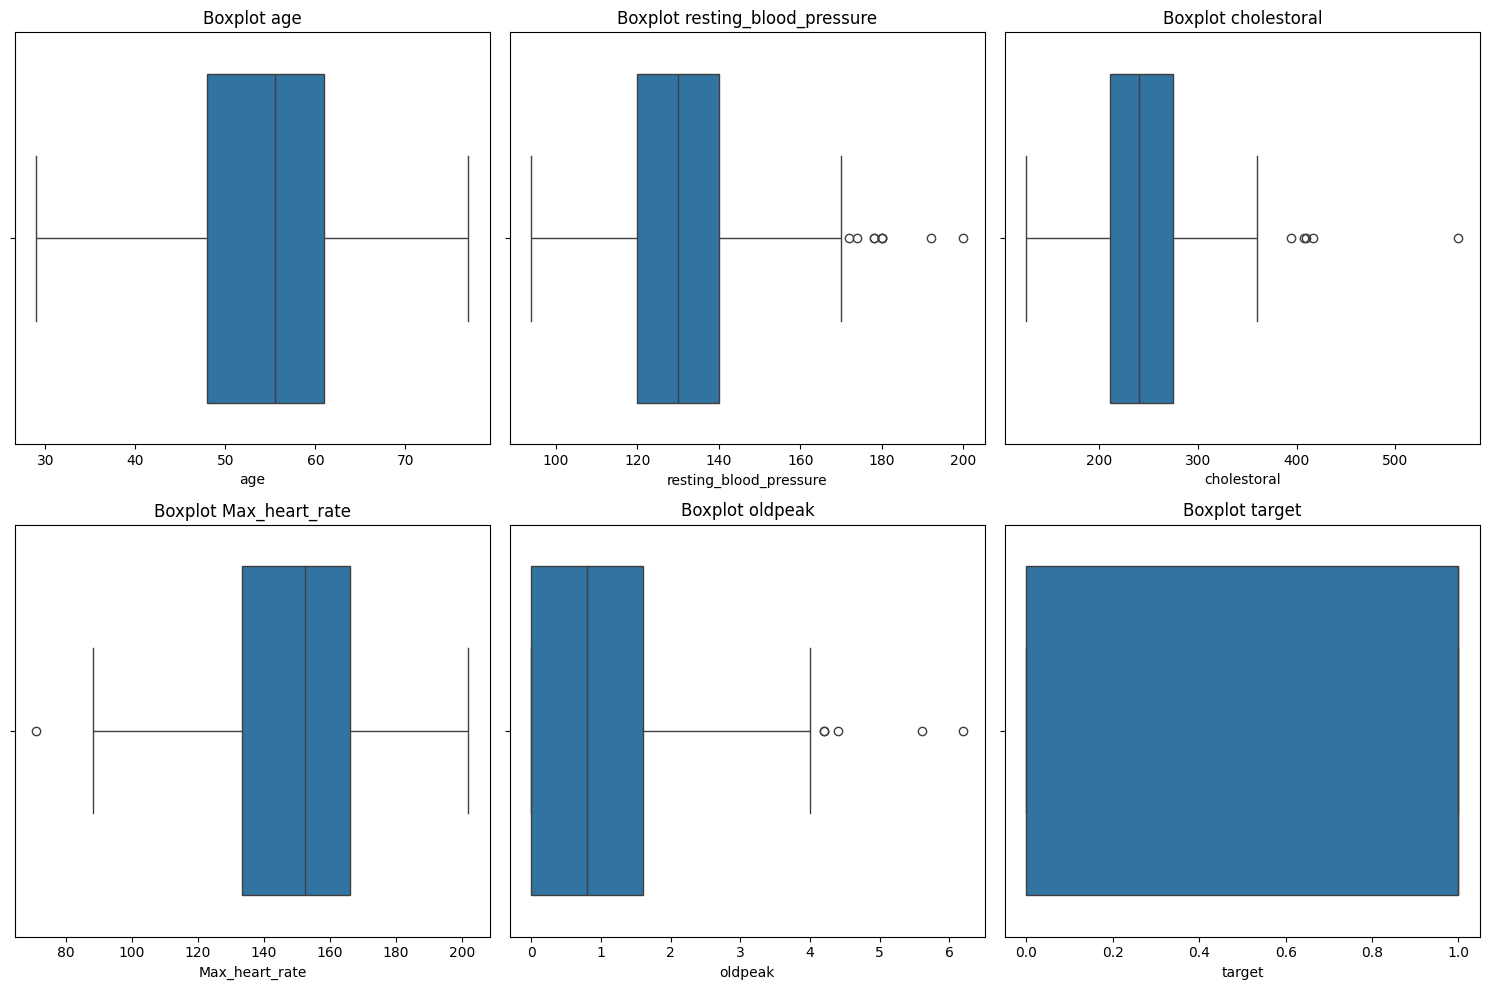

In [120]:
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data_clean[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [127]:
# Menghapus data yang outliers
for column in data_clean.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data_clean[column].quantile(0.25)
    Q3 = data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_clean = data_clean[(data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)]

In [128]:
data_clean.shape

(283, 14)

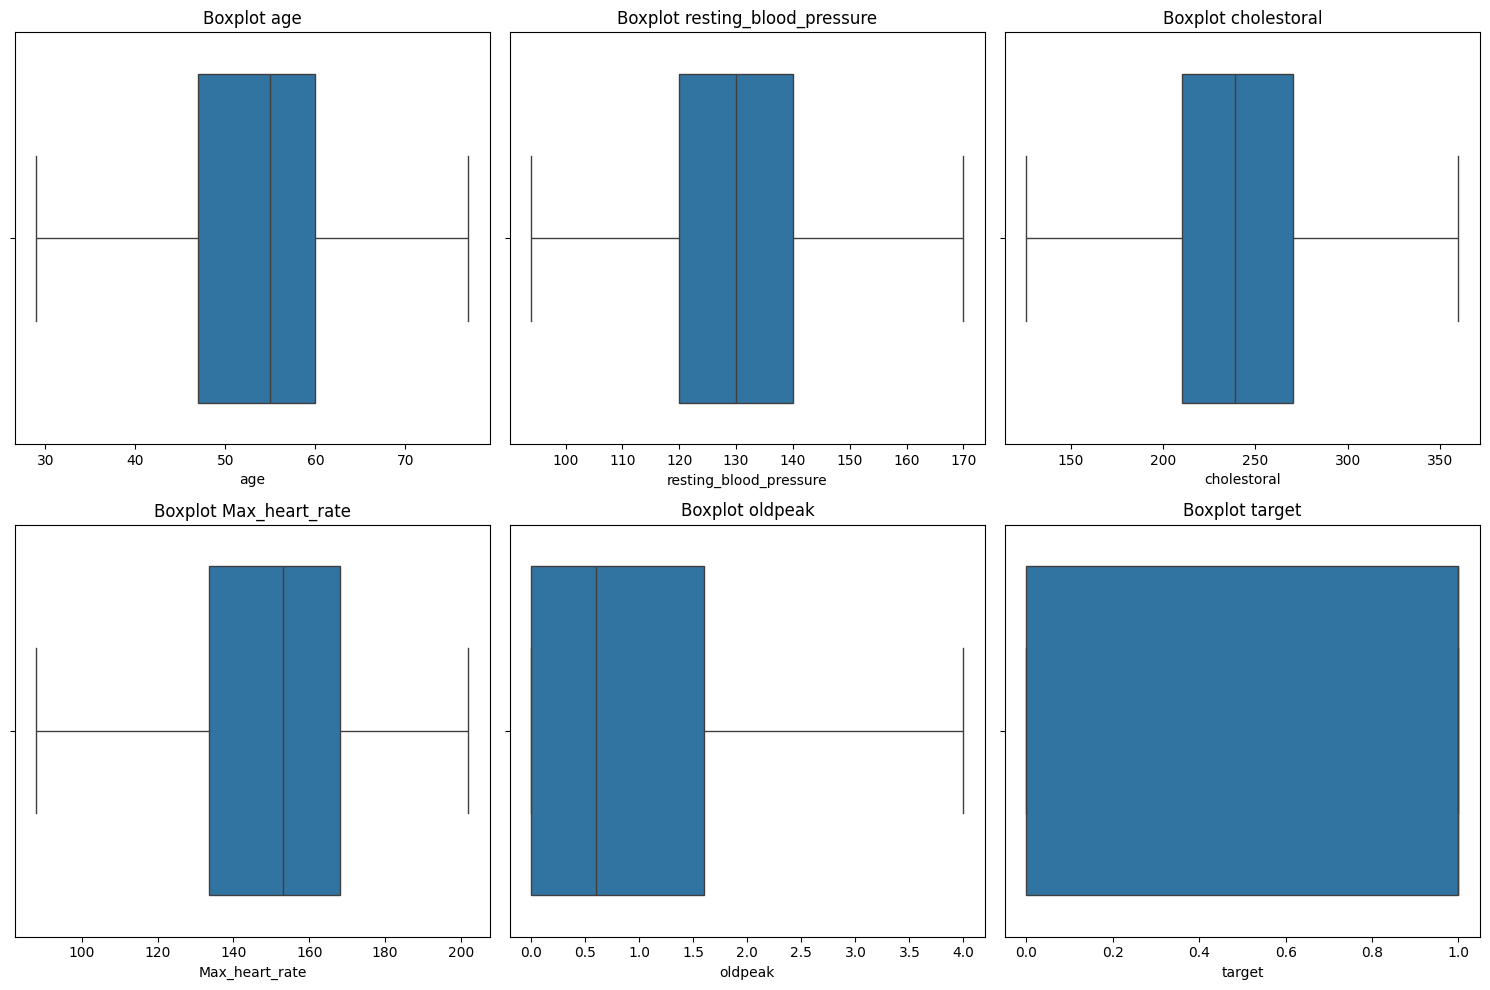

In [135]:
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64'])

# data setelah di hapus outliernya
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data_clean[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [136]:
data_clean.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,129.883392,242.314488,149.961131,0.951943,0.558304
std,9.128186,15.387795,44.654188,22.691625,1.026400,0.497469
min,29.000000,94.000000,126.000000,88.000000,0.000000,0.000000
25%,47.000000,120.000000,210.500000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000,1.000000
75%,60.000000,140.000000,270.500000,168.000000,1.600000,1.000000
max,77.000000,170.000000,360.000000,202.000000,4.000000,1.000000


#

In [156]:
data_clean.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


# **Exploratory data Analysis**

# **Distribusi Target Variabel**

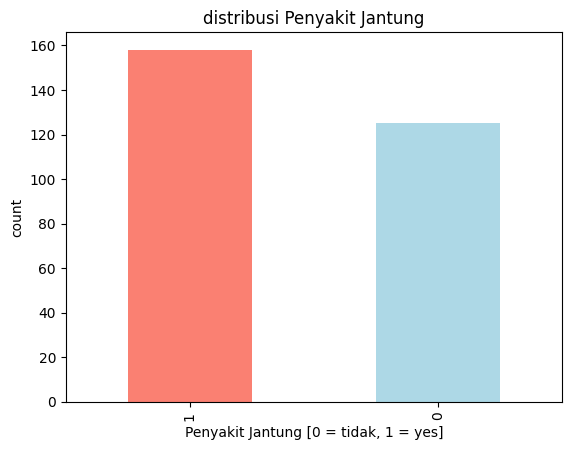

In [157]:
data_clean['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Target Varibel')
plt.xlabel('Penyakit Jantung [0 = tidak, 1 = yes]')
plt.ylabel('count')
plt.title('distribusi Penyakit Jantung')
plt.show()

# **Data Preparation**

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
# Encode data
data_category = data_clean.select_dtypes(include=['object'])

label_encode = LabelEncoder()
for column in data_category.columns:
    data_clean[column] = label_encode.fit_transform(data_clean[column])

# **Matrix korelasi**

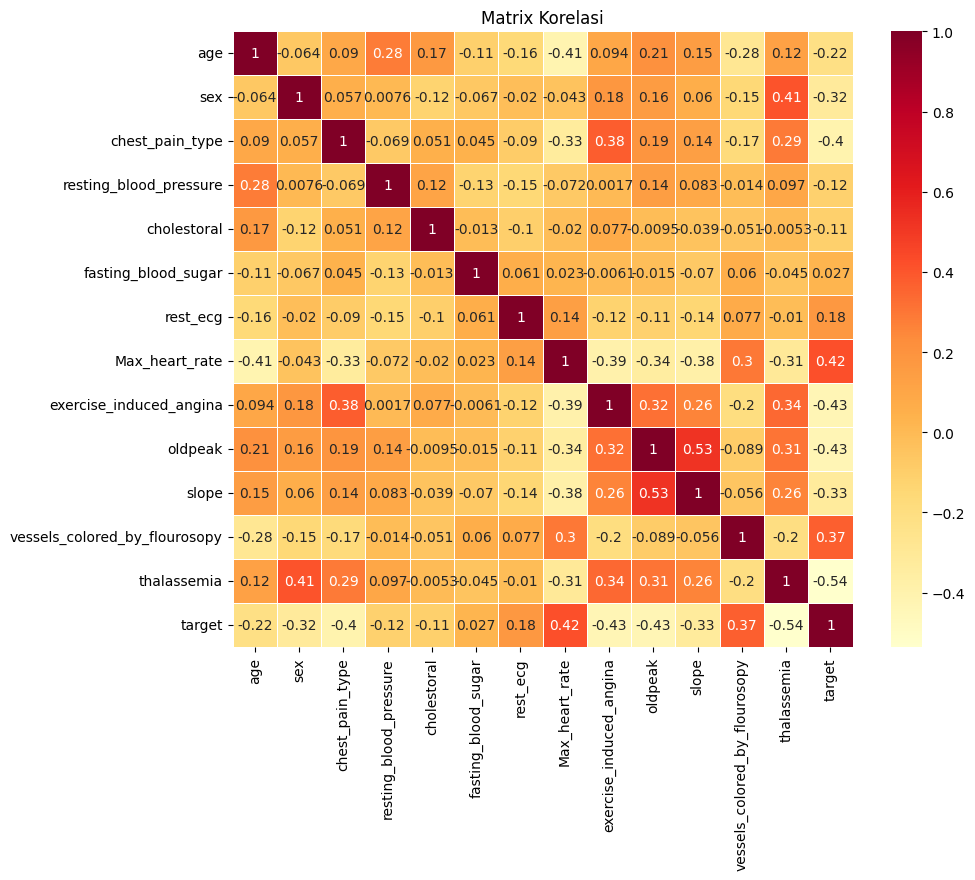

In [158]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Matrix Korelasi')
plt.show()



*   dalam heatmep di atas yang memiliki hubungan yang kuat anatara target dan max_hear6_rate dan Vessels Colored by Fluoroscopy



# **Feature Engginering**

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [162]:
X = data_clean.drop('target', axis=1)
y = data_clean['target']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Model**

In [164]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Evaluasi**

In [169]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Akurasi Score: ", test_data_accuracy)

Akurasi Score:  0.8470588235294118


In [170]:
X_test

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
10,71,0,3,112,149,1,2,125,0,1.6,1,4,0
473,41,1,2,130,214,1,1,168,0,2.0,1,4,0
191,56,1,1,130,221,1,1,163,0,0.0,0,4,3
334,60,1,3,130,206,1,1,132,1,2.4,1,3,3
95,45,0,3,138,236,1,1,152,1,0.2,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,67,0,3,106,223,1,2,142,0,0.3,0,3,0
156,40,1,0,140,199,1,2,178,1,1.4,0,4,3
694,39,1,3,118,219,1,2,140,0,1.2,1,4,3
105,47,1,3,110,275,1,1,118,1,1.0,1,1,0


In [176]:
# Prediksi dengan dataset baru
X_new = (40, 0, 3, 130, 222, 0, 175, 1, 2.4, 1, 3, 3, 3)
X_new = np.asarray(X_new)
X_new = X_new.reshape(1, -1)
prediction = model.predict(X_new)
print(f"Prediksi data baru: {prediction}")

if prediction[0] == 0:
    print("Pasien tidak memiliki penyakit jantung")
else:
    print("Pasien memiliki penyakit jantung")

Prediksi data baru: [1]
Pasien memiliki penyakit jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
